===Task===
Generate a 2 class data using sklearn, and use them on Gaussian Naive Classification. Put them into class and calculate accuracy accordingly.

In [79]:
import numpy as np
import matplotlib.pyplot as plt

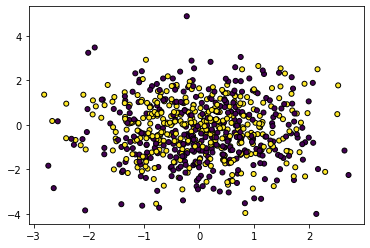

In [93]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=700, n_features=15, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=30)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
class NaiveGaussian:
    def __init__(self):
        pass
    
    def fit(self,X_train,y_train):
        n = X_train.shape[1]
        self.classes = np.unique(y_train)
        self.mean = np.zeros((len(self.classes), n))
        self.std = np.zeros((len(self.classes), n))
        
        
        #on X_train
        for label in self.classes:
            self.mean[label, :] = X_train[y_train==label].mean(axis=0)
            self.std[label, :]  = X_train[y_train==label].std(axis=0)
            
        #for P(y)     
        m = []
        for label in  self.classes:
            m.append(len(X_train[y_train==label]))
            
        self.priors = []        
        for i,label in enumerate(self.classes):
            self.priors.append(m[i] / y_train.shape[0])  
        print(self.priors)
            
     
            
    def gaussian_pdf(self,X,mean,std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
        
    def predict(self, X_test):     
        posteriors = np.zeros((X_test.shape[0],len(self.classes)))
        
        for i,label in enumerate(self.classes):
            #on X_test
            likelihood = self.gaussian_pdf(X_test, self.mean[i, :], self.std[i, :])                       
            total_likelihood = np.prod(likelihood, axis=1)
            posteriors[:,i] = self.priors[i] * total_likelihood
            
        yhat = np.argmax(posteriors, axis = 1)
        return yhat

In [96]:
NGB = NaiveGaussian()
NGB.fit(X_train, y_train)
yhat = NGB.predict(X_test)

[0.5163265306122449, 0.48367346938775513]


In [97]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7524553571428572
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.81      0.74      0.78        98
           1       0.79      0.85      0.82       112

    accuracy                           0.80       210
   macro avg       0.80      0.80      0.80       210
weighted avg       0.80      0.80      0.80       210

